In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
tf.keras.layers.Dense(25, activation = "sigmoid")

   temperature   duration  good_roast
0   213.361760  11.266449           0
1   237.625959  13.270581           1
2   180.009150  16.859421           0
3   204.186606  11.572698           0
4   191.740471  17.085352           0


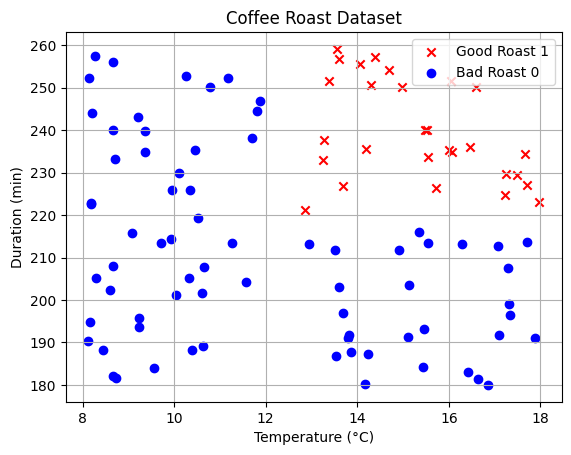

array([13.27058102, 17.9732285 , 14.96818161, 15.55463053, 17.23024536,
       16.60027949, 13.38831064, 13.61030219, 16.00632673, 16.07105196,
       15.47121643, 13.56240234, 17.6727633 , 17.70019989, 16.46828801,
       14.19955718, 12.86345111, 14.06329462, 13.68851437, 14.69232893,
       14.29717507, 15.52755554, 16.04754564, 14.39460881, 13.24670309,
       17.2480797 , 15.7217803 , 17.49016321])

In [ ]:
np.random.seed(1)

# Create 100 roast examples
num_samples = 100

# Feature 1: Roast Temperature (°C) — between 180 and 260
temperature = np.random.uniform(180, 260, num_samples)

# Feature 2: Roast Duration (min) — between 8 and 18 minutes
duration = np.random.uniform(8, 18, num_samples)

# Label: 1 if temp > 220 and duration > 12, else 0 (good roast = 1)
labels = ((temperature > 220) & (duration > 12)).astype(int)

# Combine into dataset
df = pd.DataFrame({
    "temperature": temperature,
    "duration": duration,
    "good_roast": labels
})

# Save if needed
# df.to_csv("coffee_roast_dataset.csv", index=False)

# Preview
print(df.head())

# Optional: Plot

df_0 = df[df["good_roast"] == 0]
df_1 = df[df["good_roast"] == 1]

X = df[["temperature", "duration"]].to_numpy()
Y = df["good_roast"].to_numpy()

pos = Y == 1
neg = Y == 0


# plt.scatter(df["temperature"], df["duration"], c=df["good_roast"], cmap='coolwarm', label = "0")

# plt.scatter(df_0["temperature"], df_0["duration"], c = "blue", label = "Bad Roast 0")
# plt.scatter(df_1["temperature"], df_1["duration"], c = "red", label = "Good Roast 1")

plt.scatter(X[pos, 1], X[pos, 0], c = "red", marker = 'x', label = "Good Roast 1")
plt.scatter(X[neg, 1], X[neg, 0], c = "blue", marker = "o", label = "Bad Roast 0")

plt.legend(fontsize = "medium")
plt.xlabel("Temperature (°C)")
plt.ylabel("Duration (min)")
plt.title("Coffee Roast Dataset")
plt.grid(True)
plt.show()

In [129]:
norm_l = tf.keras.layers.Normalization(axis = -1)
norm_l.adapt(X);
Xn = norm_l(X)

Xn[:4]

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[-0.2338848 , -0.5002417 ],
       [ 0.79634947,  0.13350517],
       [-1.6500033 ,  1.2683684 ],
       [-0.6234529 , -0.40339974]], dtype=float32)>

In [130]:
# Define sigmoid function

def g(z):

    exp = np.exp(-z)
    g_z = 1 / (1 + exp)
    return g_z

In [161]:
def dense(a_in, W, b):

    units = W.shape[1]
    a_out = np.zeros(units)

    for j in range(units):

        w = W[:, j]
        z = np.dot(w, a_in) + b[j]
        a_out[j] = g(z)

    return a_out


In [166]:
def my_sequential(x, W1, b1, W2, b2):

    a1 = dense(x, W1, b1)
    a2 = dense(a1, W2, b2)
    return a2

In [167]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

In [169]:
def predict(X, W1, b1, W2, b2):

    m = X.shape[0]
    p = np.zeros((m, 1))
    for i in range(m):

        p[i,0] = my_sequential(X[i], W1, b1, W2, b2)
    return p


In [172]:
X_tst = np.array([
    [200, 13.9], #positive
    [200, 17] #negative
])

X_tstn = norm_l(X_tst) # normalize
predictions = predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

C:\Users\Salma\AppData\Local\Temp\ipykernel_14624\3651919163.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i,0] = my_sequential(X[i], W1, b1, W2, b2)


In [175]:
def threshold(predictions):
    yhat = np.zeros_like(predictions)

    for i in range(len(predictions)):

        if(predictions[i] >= 0.5):
            yhat[i] = 1
        else:
            yhat[i] = 0
    return yhat

In [181]:
predictions = predict(norm_l(X), W1_tmp, b1_tmp, W2_tmp, b2_tmp)

predictions = threshold(predictions)

predictions.astype(int), Y

C:\Users\Salma\AppData\Local\Temp\ipykernel_14624\3651919163.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i,0] = my_sequential(X[i], W1, b1, W2, b2)


(array([[1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],